# **Uber Price Prediction**

---

#### **Introduction**
##### The Kaggle dataset offers a rich repository of ride information from Uber services in Boston, MA, spanning a two-month period. It boasts 57 feature columns, encompassing both core ride data (hour, day, month, distance) and detailed weather information (temperature, precipitation, wind, etc.) for each trip. Our target variable is the price of each ride. Our objective is to construct a regression model capable of predicting Uber ride prices using a subset of these features. Our approach involves several steps:
-    **Exploratory Data Analysis (EDA):** We'll conduct EDA to gain insights into the data distribution and understand relationships between features. This step is crucial for identifying patterns and selecting relevant features.
-    **Feature Selection:** Based on our EDA findings, we'll manually select 25 features that are deemed relevant and potentially interpretable. These features will form the initial set of inputs for our regression model.
-    **GridSearchCV Optimization:** We'll employ GridSearchCV, an exhaustive hyperparameter search technique, to fine-tune our regression model's performance. This optimization process involves evaluating the model's performance on unseen data using metrics like Mean Squared Error (MSE).

##### The set of features for our model includes: 
-    Hour: Time of day the ride took place.
-    Day: Day of the week (e.g., Monday, Tuesday).
-    Month: Month of the year.
-    Distance: Distance traveled during the ride.
-    Temperature: Air temperature at the ride start time.
-    Apparent temperature: "Feels like" temperature considering humidity.
-    Precipitation intensity: Rainfall intensity at the ride start time.
-    Precipitation probability: Likelihood of rain during the ride.
-    Humidity: Amount of moisture in the air.
-    Wind speed: Speed of wind at the ride start time.
-    Wind gust: Strongest wind speed recorded during the ride.
-    Wind gust time: Time when the wind gust occurred.
-    Visibility: Distance at which objects can be clearly seen.
-    Dew point: Temperature at which air condenses into fog or dew.
-    Pressure: Atmospheric pressure at the ride start time.
-    Wind bearing: Direction from which the wind is blowing.

##### These features will serve as input variables for our model, enabling us to accurately predict Uber ride prices. It's worth noting that GridSearchCV may identify an even more optimal subset of features for our final model, providing additional refinement opportunities.



---

#### **Import Libraries**

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
#Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
#Remove Scientific Notation
pd.options.display.float_format = '{:.2f}'.format # Remove scientific notation

In [3]:
#Import ML Modules
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import ensemble
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

---

#### **Load Data**

In [4]:
df = pd.read_csv("/kaggle/input/uber-and-lyft-dataset-boston-ma/rideshare_kaggle.csv")

---

#### **View Data**

In [5]:
#Dataset Length
print(df.shape)

(693071, 57)


In [6]:
# Check Duplicates
df.duplicated().sum()

0

In [7]:
# Get Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [8]:
# Get Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [9]:
# Descriptive statistics (for object)
df.describe(include=['object']).T

,count,unique,top,freq
id,693071,693071,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1
datetime,693071,31350,2018-11-26 23:21:14,156
timezone,693071,1,America/New_York,693071
source,693071,12,Financial District,58857
destination,693071,12,Financial District,58851
cab_type,693071,2,Uber,385663
product_id,693071,13,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,55096
name,693071,13,UberXL,55096
short_summary,693071,9,Overcast,218895
long_summary,693071,11,Mostly cloudy throughout the day.,202340


In [10]:
#Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,693071.00,1544045709.76,689192.49,1543203646.00,1543443968.00,1543737478.00,1544827509.00,1545160511.00
hour,693071.00,11.62,6.95,0.00,6.00,12.00,18.00,23.00
day,693071.00,17.79,9.98,1.00,13.00,17.00,28.00,30.00
month,693071.00,11.59,0.49,11.00,11.00,12.00,12.00,12.00
price,637976.00,16.55,9.32,2.50,9.00,13.50,22.50,97.50
distance,693071.00,2.19,1.14,0.02,1.28,2.16,2.92,7.86
surge_multiplier,693071.00,1.01,0.09,1.00,1.00,1.00,1.00,3.00
latitude,693071.00,42.34,0.05,42.21,42.35,42.35,42.36,42.37
longitude,693071.00,-71.07,0.02,-71.11,-71.08,-71.06,-71.05,-71.03
temperature,693071.00,39.58,6.73,18.91,36.45,40.49,43.58,57.22


In [11]:
# Top 5 Rows
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1544952607.89,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.13,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1543284023.68,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.13,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1543366822.20,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.11,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1543553582.75,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.00,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1543463360.22,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.00,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [12]:
#Bottom 5 Rows
df.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1543708386.00,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.00,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1543708386.00,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.00,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1543708386.00,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.00,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1543708386.00,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.00,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1543708386.00,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.00,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [13]:
#Drop Missing Values
df = df.dropna()

In [14]:
#Check Missing Values 
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [15]:
#Drop Unecessary Columns
cols = [ 'apparentTemperature','precipIntensity','humidity','windSpeed','apparentTemperatureHigh','dewPoint',
        'precipIntensityMax','apparentTemperatureMax','cloudCover','moonPhase','windGustTime','visibility',
        'temperatureHighTime','apparentTemperatureHighTime','apparentTemperatureLow' ,'apparentTemperatureLowTime',
        'temperatureMinTime','temperatureMaxTime','apparentTemperatureMin','apparentTemperatureMinTime', 
        'apparentTemperatureMaxTime','windBearing','sunriseTime','uvIndex','visibility.1','ozone','sunsetTime','uvIndexTime']
df = df.drop(cols, axis=1)

---

#### **Retrieve Unique Values**

In [16]:
#Retrieve Unique Values in the Column
df.timezone.unique()

array(['America/New_York'], dtype=object)

In [17]:
#Retrieve Unique Values in the Column
df.source.unique()

array(['Haymarket Square', 'Back Bay', 'North End', 'North Station',
       'Beacon Hill', 'Boston University', 'Fenway', 'South Station',
       'Theatre District', 'West End', 'Financial District',
       'Northeastern University'], dtype=object)

In [18]:
#Retrieve Unique Values in the Column
df.destination.unique()

array(['North Station', 'Northeastern University', 'West End',
       'Haymarket Square', 'South Station', 'Fenway', 'Theatre District',
       'Beacon Hill', 'Back Bay', 'North End', 'Financial District',
       'Boston University'], dtype=object)

In [19]:
#Retrieve Unique Values in the Column
df.cab_type.unique()

array(['Lyft', 'Uber'], dtype=object)

In [20]:
#Retrieve Unique Values in the Column
df.name.unique()

array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black',
       'UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool'],
      dtype=object)

In [21]:
#Retrieve Unique Values in the Column
df.short_summary.unique()

array([' Mostly Cloudy ', ' Rain ', ' Clear ', ' Partly Cloudy ',
       ' Overcast ', ' Light Rain ', ' Foggy ', ' Possible Drizzle ',
       ' Drizzle '], dtype=object)

In [22]:
#Retrieve Unique Values in the Column
df.long_summary.unique()

array([' Rain throughout the day. ',
       ' Rain until morning, starting again in the evening. ',
       ' Light rain in the morning. ',
       ' Partly cloudy throughout the day. ',
       ' Mostly cloudy throughout the day. ',
       ' Light rain in the morning and overnight. ',
       ' Light rain until evening. ', ' Foggy in the morning. ',
       ' Overcast throughout the day. ',
       ' Possible drizzle in the morning. ',
       ' Rain in the morning and afternoon. '], dtype=object)

In [23]:
#Retrieve Unique Values in the Column
df.icon.unique()

array([' partly-cloudy-night ', ' rain ', ' clear-night ', ' cloudy ',
       ' fog ', ' clear-day ', ' partly-cloudy-day '], dtype=object)

---

#### **Generate Weekday Names**

In [24]:
#Generate the names of days from the timestamps
weekday = [calendar.day_name[x.dayofweek] for x in
          pd.to_datetime(df['datetime'], format= "%Y/%m/%d %H:%M:%S")]
weekday = pd.Series(weekday)

---

#### **Value Counts**

In [25]:
# Value Counts in Source Column
df['source'].value_counts()

Financial District         54197
Back Bay                   53201
Theatre District           53201
Boston University          53172
North End                  53171
Fenway                     53166
Northeastern University    53164
South Station              53160
Haymarket Square           53147
West End                   52980
Beacon Hill                52841
North Station              52576
Name: source, dtype: int64

In [26]:
# Value Counts in Destination Column
df['destination'].value_counts()

Financial District         54192
Back Bay                   53190
Theatre District           53189
Haymarket Square           53171
Boston University          53171
Fenway                     53166
Northeastern University    53165
North End                  53164
South Station              53159
West End                   52992
Beacon Hill                52840
North Station              52577
Name: destination, dtype: int64

In [27]:
# Value Counts in Cab Type Column
df['cab_type'].value_counts()

Uber    330568
Lyft    307408
Name: cab_type, dtype: int64

In [28]:
# Value Counts in Name Column
df['name'].value_counts()

UberXL          55096
WAV             55096
Black SUV       55096
Black           55095
UberX           55094
UberPool        55091
Lux             51235
Lyft            51235
Lux Black XL    51235
Lyft XL         51235
Lux Black       51235
Shared          51233
Name: name, dtype: int64

In [29]:
# Value Counts in Short Summary Column
df['short_summary'].value_counts()

 Overcast             201429
 Mostly Cloudy        134603
 Partly Cloudy        117226
 Clear                 80256
 Light Rain            50488
 Rain                  21781
 Possible Drizzle      17176
 Foggy                  8292
 Drizzle                6725
Name: short_summary, dtype: int64

In [30]:
# Value Counts in Long Summary Column
df['long_summary'].value_counts()

 Mostly cloudy throughout the day.                      186262
 Partly cloudy throughout the day.                      133744
 Light rain in the morning.                              94423
 Rain throughout the day.                                49929
 Light rain in the morning and overnight.                46575
 Rain until morning, starting again in the evening.      44071
 Foggy in the morning.                                   41201
 Light rain until evening.                               32690
 Overcast throughout the day.                             6906
 Possible drizzle in the morning.                         1708
 Rain in the morning and afternoon.                        467
Name: long_summary, dtype: int64

In [31]:
# Value Counts in Icon Column
df['icon'].value_counts()

 cloudy                  201429
 partly-cloudy-night     145492
 partly-cloudy-day       106337
 rain                     96170
 clear-night              55577
 clear-day                24679
 fog                       8292
Name: icon, dtype: int64

---

#### **Visualize Cab Type**
-   Uber enjoys greater popularity compared to Lyft.

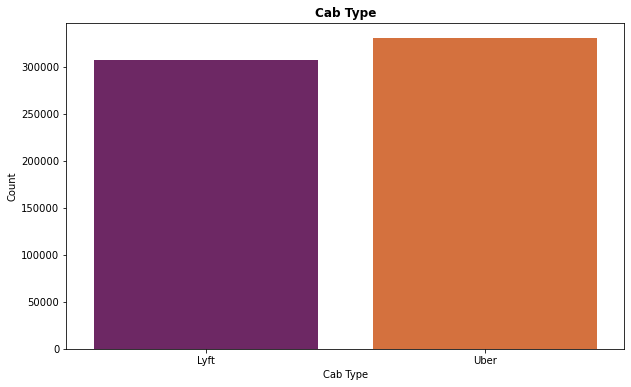

In [32]:
#Cab Type
plt.figure(figsize=(10, 6)) 
sns . countplot(x= 'cab_type' ,data=df, palette = 'inferno')
plt.title('Cab Type', fontweight='bold')
plt.ylabel('Count') 
plt.xlabel('Cab Type') 
plt.show()

---

#### **Visualize Trip Source**
-    Our data indicates that the Financial District, Back Bay, and Theatre District are the top hotspots for ride pickups.

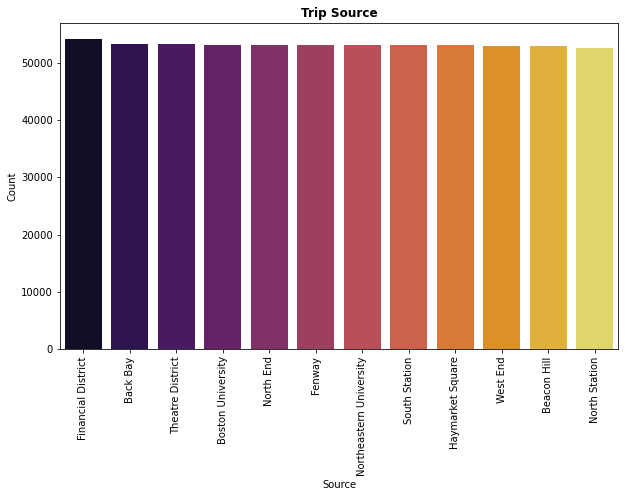

In [33]:
#Source
plt.figure(figsize=(10, 6))  # Adjust the width and height 
sns.countplot(x='source', data=df, order=df['source'].value_counts().index, palette = 'inferno')
plt.xticks(rotation=90)  # Rotates the x-axis labels by 90 degrees
plt.ylabel('Count') 
plt.xlabel('Source')
plt.title('Trip Source', fontweight='bold')
plt.show()

---

#### **Visualize Trip Destination**
-    Riders are most frequently dropped off in the Financial District, Back Bay, and Theatre District.

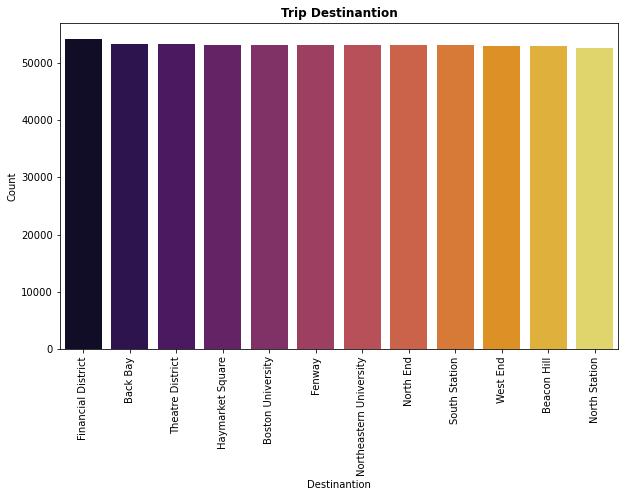

In [34]:
#Destination
plt.figure(figsize=(10, 6))  # Adjust the width and height 
sns.countplot(x='destination', data=df, order=df['destination'].value_counts().index, palette = 'inferno')
plt.xticks(rotation=90)  # Rotates the x-axis labels by 90 degrees
plt.ylabel('Count') 
plt.xlabel('Destinantion')
plt.title('Trip Destinantion', fontweight='bold')
plt.show()

---

#### **Visualize Cab Name**
-    UberXL is a popular choice among riders for larger capacity vehicles.

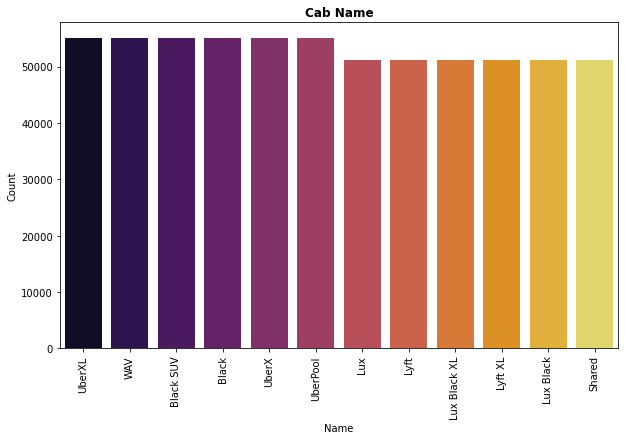

In [35]:
#Name
plt.figure(figsize=(10, 6))  # Adjust the width and height 
sns.countplot(x='name', data=df, order=df['name'].value_counts().index, palette = 'inferno')
plt.xticks(rotation=90)  # Rotates the x-axis labels by 90 degrees
plt.ylabel('Count') 
plt.xlabel('Name')
plt.title('Cab Name', fontweight='bold')
plt.show()

---

#### **Visualize Trips by Weekday**
-    Tuesday records the highest volume of rides.

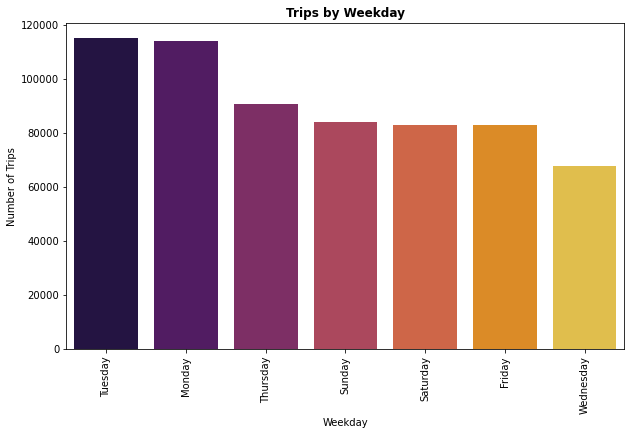

In [36]:
# Count the occurrences of each weekday
weekday_counts = weekday.value_counts()

# Sort weekdays based on their counts
weekday_sorted = weekday_counts.sort_values(ascending=False).index

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x=weekday, order=weekday_sorted, palette = 'inferno')
plt.xlabel('Weekday')
plt.ylabel('Number of Trips')
plt.title('Trips by Weekday', fontweight = 'bold')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

---

#### **Visualize Trips by Month**
-    December experienced the highest volume of rides.

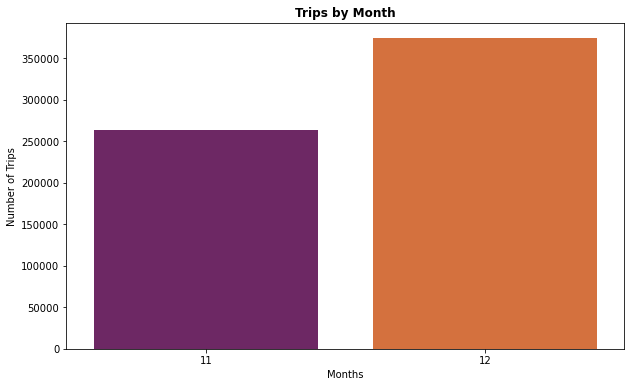

In [37]:
plt.figure(figsize=(10, 6)) 
sns . countplot(x= 'month' ,data=df, palette = 'inferno')
plt.title('Trips by Month', fontweight='bold')
plt.ylabel('Number of Trips') 
plt.xlabel('Months') 
plt.show()

---

#### **Visualize Trips by Hour**
-    The peak number of rides occurs between 11 PM and midnight.

Text(0.5, 1.0, 'Number of Trips per Hour')

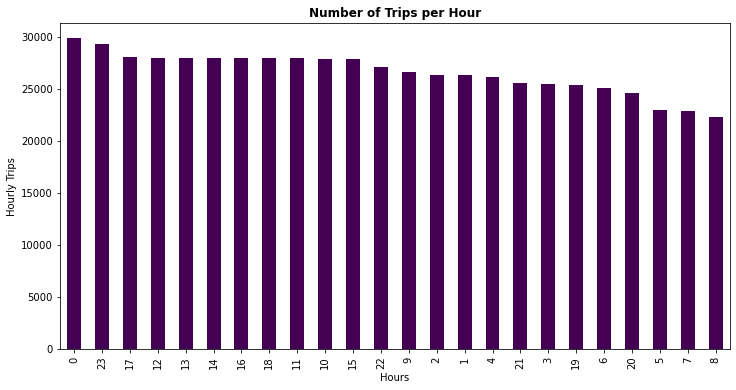

In [38]:
#Hourly Trips
hours = df['hour'].value_counts()
hours.plot(kind= 'bar', cmap='viridis', figsize= (12,6))
plt.xlabel( 'Hours' )
plt.ylabel( 'Hourly Trips' )
plt.title( 'Number of Trips per Hour', fontweight = 'bold')

---

#### **Visualize November Daily Trips**
-    November 27th experienced the highest number of rides.

Text(0.5, 1.0, 'Number of Daily Trips in November')

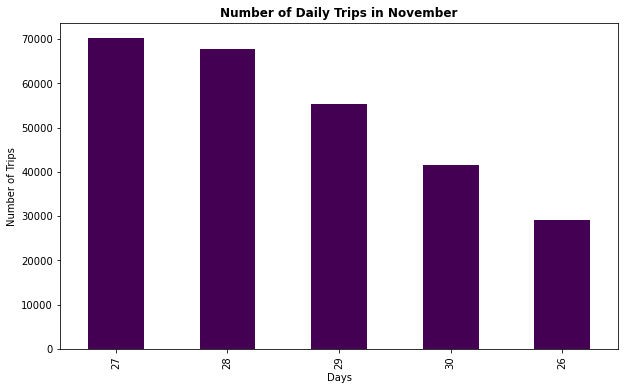

In [39]:
#Daily Trips
nov = df[ 'day' ][df['month']==11].value_counts()
nov.plot(kind='bar', cmap='viridis', figsize=(10, 6) )
plt.xlabel('Days')
plt.ylabel('Number of Trips' )
plt.title( 'Number of Daily Trips in November', fontweight = 'bold')

---

#### **Visualize December Daily Trips**
-    December 1st emerged as the busiest day for rides.

Text(0.5, 1.0, 'Number of Daily Trips in December')

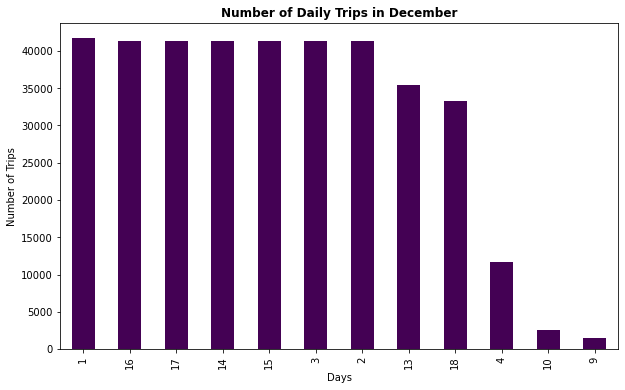

In [40]:
#December Daily Trips
dec = df[ 'day' ][df['month']==12].value_counts()
dec.plot(kind='bar', cmap='viridis', figsize=(10, 6) )
plt.xlabel('Days')
plt.ylabel('Number of Trips' )
plt.title( 'Number of Daily Trips in December', fontweight = 'bold')

---

#### **Visualize November Daily Prices**
-    The most expensive rides occurred at midnight on November 27th.

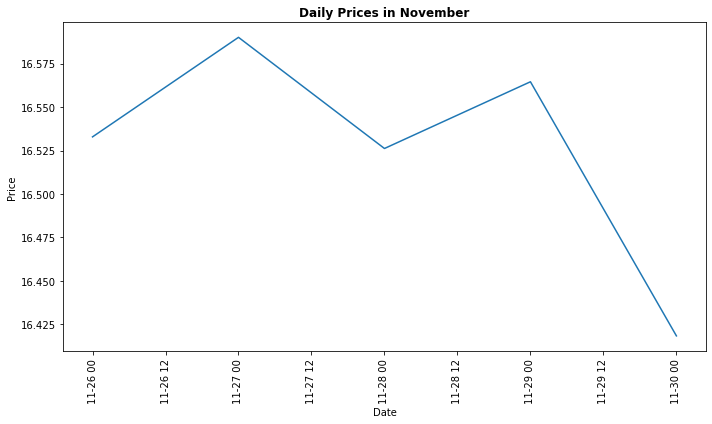

In [41]:
# Convert 'datetime' column to datetime format
df['dtm'] = pd.to_datetime(df['datetime'])

# Filter the DataFrame to include only data for November
november_data = df[df['dtm'].dt.month == 11]

# Group by date and calculate the mean price for each day
daily_prices = november_data.groupby(november_data['dtm'].dt.date)['price'].mean()

# Plotting the daily prices for November
plt.figure(figsize=(10, 6))
plt.plot(daily_prices.index, daily_prices.values, marker='', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Prices in November', fontweight = 'bold')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.grid(False)  # Remove gridlines
plt.tight_layout()
plt.show()

---

#### **Visualize December Daily Prices**

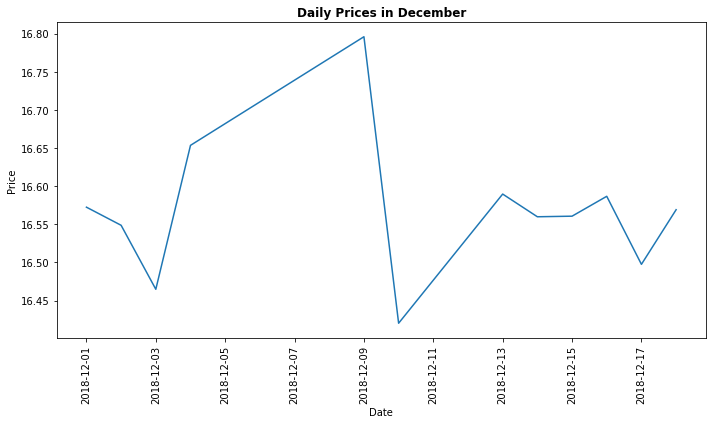

In [42]:
# Convert 'datetime' column to datetime format
df['dtm'] = pd.to_datetime(df['datetime'])

# Filter the DataFrame to include only data for November
december_data = df[df['dtm'].dt.month == 12]

# Group by date and calculate the mean price for each day
daily_prices = december_data.groupby(december_data['dtm'].dt.date)['price'].mean()

# Plotting the daily prices for November
plt.figure(figsize=(10, 6))
plt.plot(daily_prices.index, daily_prices.values, marker='', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Prices in December', fontweight = 'bold')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.grid(False)  # Remove gridlines
plt.tight_layout()
plt.show()

---

#### **Visualize Trips from Pickup Location**
-    Our data reveals Financial District, Back Bay, Theatre District, and Boston University as top ride origin points.

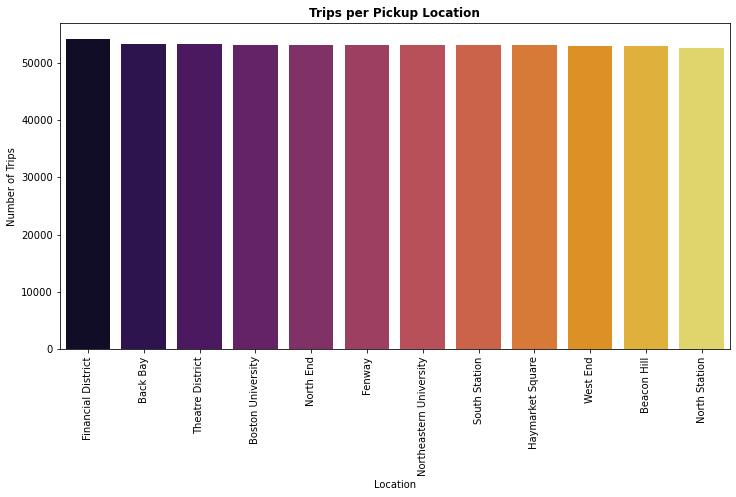

In [43]:
#Trips from Source
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed
sns.countplot(x='source', data=df, order=df['source'].value_counts().nlargest(15).index, palette = 'inferno')
plt.xticks(rotation=90)  # Rotates the x-axis labels by 90 degrees
plt.ylabel('Number of Trips') 
plt.xlabel('Location')
plt.title('Trips per Pickup Location', fontweight='bold')
plt.show()

---

#### **Visualize Trips from Drop-Off Location**
-    Financial District, Back Bay, Theatre District, and Haymarket Square are top rider destinations.

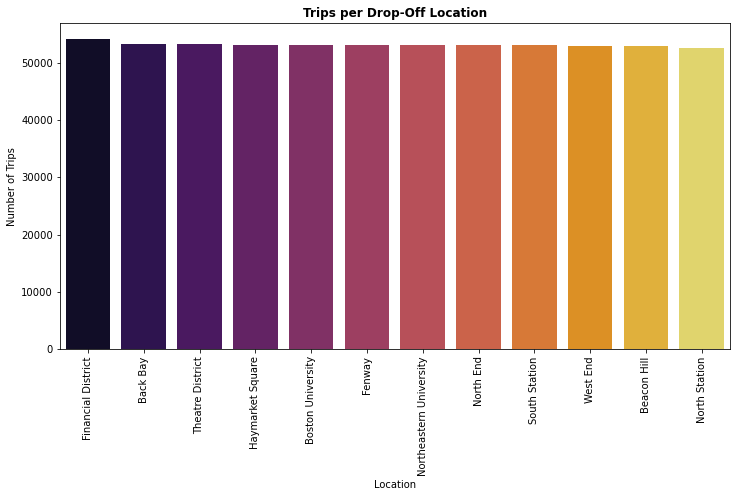

In [44]:
#Destination Location
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed
sns.countplot(x='destination', data=df, order=df['destination'].value_counts().nlargest(15).index, palette = 'inferno')
plt.xticks(rotation=90)  # Rotates the x-axis labels by 90 degrees
plt.ylabel('Number of Trips') 
plt.xlabel('Location')
plt.title('Trips per Drop-Off Location', fontweight='bold')
plt.show()

---

#### **Visualize Trip Frequency**
-    Our analysis indicates a recurring pattern: frequent Uber trips between South Station and the Financial District.

Text(0.5, 1.0, 'Frequency of Trips')

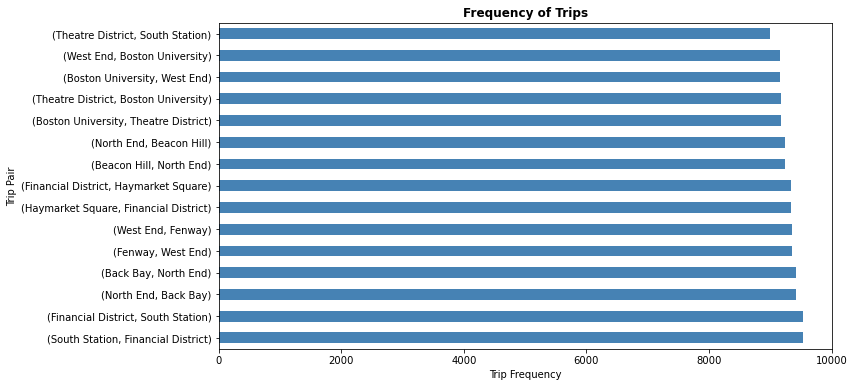

In [45]:
#Frequency of Trips from Location A to B
a_b = df[[ 'source', 'destination'] ].value_counts().nlargest(15)
a_b.plot(kind='barh', color= 'steelblue', figsize=(11, 6))
plt.xlabel('Trip Frequency')
plt.ylabel('Trip Pair' )
plt.title( 'Frequency of Trips', fontweight = 'bold')

---

#### **Correlation**
##### Correlation, in the context of statistics, refers to the degree to which two variables are related. It describes the direction and strength of the association between those variables. There are two main types of correlation:
-    **Positive correlation:** This indicates that as the value of one variable increases, the value of the other variable also tends to increase. For example, there might be a positive correlation between ride distance and Uber ride price - as the distance traveled increases, the price tends to go up as well.
-    **Negative correlation:** This indicates that as the value of one variable increases, the value of the other variable tends to decrease.

##### Analysis of ride data reveals weak correlations for most features (weather, time) with price. Distance and surge_multiplier show stronger positive correlations, suggesting they influence price more.

In [46]:
corr = df.corr()['price'].sort_values()
corr = corr.map("{:.4f}".format)
print(corr)

longitude             -0.0014
day                   -0.0007
temperatureMax        -0.0005
temperatureHigh       -0.0005
temperatureMin        -0.0004
precipProbability     -0.0002
temperature           -0.0001
temperatureLow         0.0002
hour                   0.0006
temperatureLowTime     0.0008
timestamp              0.0008
pressure               0.0009
month                  0.0009
windGust               0.0012
latitude               0.0021
surge_multiplier       0.2405
distance               0.3451
price                  1.0000
Name: price, dtype: object


---

#### **Data Preprocessing**

##### **Label Encoder**
##### Label encoding is a technique commonly used in machine learning when dealing with categorical data. Categorical data refers to features that represent qualities or classifications rather than numerical values. Examples include things like "color" (red, blue, green), "size" (small, medium, large), or "day of the week" (Monday, Tuesday, Wednesday).

##### Here's a breakdown of how label encoding works:

-    **Fitting the LabelEncoder:** Imagine a dictionary where each unique category (e.g., Monday) is assigned a unique numerical label (e.g., 0). The LabelEncoder "learns" this mapping by fitting itself to your data.
-    **Transformation:** Once fitted, the LabelEncoder can then transform your categorical data into numerical labels based on the mapping it learned. For instance, "Monday" would be converted to 0 (assuming that's the assigned label during fitting). 

In [47]:
# Initialize LabelEncoder
le = preprocessing.LabelEncoder()

In [48]:
# Fit label encoder and return encoded labels
df['id'] = le.fit_transform(df['id'])
df['datetime'] = le.fit_transform(df['datetime'])
df['timezone'] = le.fit_transform(df['timezone'])
df['source'] = le.fit_transform(df['source'])
df['destination'] = le.fit_transform(df['destination'])
df['icon'] = le.fit_transform(df['icon'])
df['cab_type'] = le.fit_transform(df['cab_type'])
df['product_id'] = le.fit_transform(df['product_id'])
df['short_summary'] = le.fit_transform(df['short_summary'])
df['long_summary'] = le.fit_transform(df['long_summary'])
df['name'] = le.fit_transform(df['name'])

In [49]:
# Access the mapping of cab name labels to encoded labels
print("Class mapping of Name:")
for i, item in enumerate(le.classes_):
    print(f"  {item}: {i}")

Class mapping of Name:
  Black: 0
  Black SUV: 1
  Lux: 2
  Lux Black: 3
  Lux Black XL: 4
  Lyft: 5
  Lyft XL: 6
  Shared: 7
  UberPool: 8
  UberX: 9
  UberXL: 10
  WAV: 11


In [50]:
# Check selected Uber length. This will be used in predicting the price
len(df[df['cab_type']==1])

330568

---

#### **Separate Class and Features in Training Data**

##### In machine learning, training data typically consists of two main parts:
-    **Features/independent variables:** These are the attributes or measurements used to predict something. In Uber ride price prediction example, features might include hour, day, distance, temperature, etc.
-    **Target variable/dependent variable:** This is the value we're trying to predict. In your case, it's the price of the Uber ride.

##### We will perform a train-test split on data using scikit-learn's train_test_split function. Here's a breakdown of what the code does:

##### **Splitting the Data**
-     x: This represents our feature data, containing the information used to predict the target variable.
-     y: This represents our target variable, the value you're trying to predict (Uber ride price).
-     test_size=0.3: This argument specifies that 30% (0.3) of the data will be allocated to the testing set. The remaining 70% will be used for training.
-     random_state = 40: This sets a seed for the random number generator, ensuring reproducibility if we run the code multiple times. This means the data split will always be the same given the same seed.

##### **Output**
-     X_train: This variable stores the training data for features.
-     X_test: This variable stores the testing data for features.
-     y_train: This variable stores the training data for target variable.
-     y_test: This variable stores the testing data for target variable.

##### By splitting the data into training and testing sets, we can train our model on the training data and then evaluate its performance on unseen data (testing data). This helps prevent overfitting and ensures the model generalizes well to new data.

In [51]:
# Slip data with price as the target
x = df[df['cab_type']==1].drop(['price', 'cab_type','dtm','id'], axis=1)
y = df[df['cab_type']==1]['price']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 40)

In [53]:
# Print the shapes
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (231397, 26)
X_test: (99171, 26)
y_train: (231397,)
y_test: (99171,)


---

#### **Machine Learning Models for Uber Ride Price Prediction**
Let's define several machine learning models that can be optimized for tasks like predicting Uber ride prices. Each model has its own strengths and weaknesses, and the best choice for our project will depend on our specific data and priorities.
##### **Linear Regression:**
-    **Concept:** This is a basic and interpretable model that learns a linear relationship between features and the target variable. It essentially fits a straight line through our data to minimize the error between the predicted and actual values.
-    **Pros:** Simple to understand, computationally efficient, good for interpretability (we can see how each feature affects the prediction).
-    **Cons:** Assumes a linear relationship between features and target variable (may not capture complex relationships well), might underperform for non-linear data.

##### **Decision Tree:**
-    **Concept:** This model works by splitting the data based on features to create a tree-like structure. At each split, it chooses the feature that best separates the data points according to the target variable.
-    **Pros:** Relatively easy to interpret, can handle both categorical and numerical features, works well even with non-linear data.
-    **Cons:** Can be prone to overfitting if not regularized, results can be sensitive to small changes in the data.

##### **Random Forest:**
-    **Concept:** This is an ensemble method that combines multiple decision trees. Each tree is trained on a random subset of features and data points, and the final prediction is the average of the individual tree predictions (regression) or majority vote (classification).
-    **Pros:** Less prone to overfitting than a single decision tree, works well with high dimensional data (many features), robust to outliers.
-    **Cons:** Can be a black box model (less interpretable than a single decision tree), can be computationally expensive to train.

##### **XGBoost (eXtreme Gradient Boosting):**
-    **Concept:** This is another ensemble method that uses gradient boosting to improve the model's performance in an iterative way. It builds multiple decision trees sequentially, each one focusing on correcting the errors of the previous tree.
-    **Pros:** Very powerful and accurate for various tasks, handles complex relationships well, can be regularized to prevent overfitting.
-    **Cons:** More complex to tune compared to simpler models, can be computationally expensive to train, can be a black box model.

##### **Choosing the Right Model**
##### Let's consider some factors that will influence our choice of model for the Uber ride price prediction task:
-    **Interpretability:** If understanding how features affect price is crucial, linear regression or decision trees might be preferable.
-    **Accuracy:** If achieving the highest possible prediction accuracy is our main goal, XGBoost is likely a strong contender.
-    **Data Complexity:** If we suspect non-linear relationships between features and price, decision tree, random forest, or XGBoost might be better choices than linear regression.
-    **Computational Resources:** Training complex models like XGBoost can be more time-consuming than simpler models.

##### By understanding the strengths and weaknesses of each model, we can make an informed decision about which ones to optimize for our Uber ride price prediction project.

In [54]:
# Define the models to be optimized
models = {
    'lr': LinearRegression(),
    'dt': DecisionTreeRegressor(),
    'rf': RandomForestRegressor(),
    #'gb': GradientBoostingRegressor(),
    'xgb': XGBRegressor()
}

In [55]:
# Define the hyperparameters grid for each model
params = {
    'lr': {},
    'dt': {'max_depth': [None, 5, 10]},
    'rf': {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]},
    #'gb': {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.05, 0.01]},
    'xgb': {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.05, 0.01]}
}

In [56]:
# Perform grid search for each model
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, params[name], cv=10, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

Best parameters for lr: {}
Best parameters for dt: {'max_depth': 10}
Best parameters for rf: {'max_depth': 10, 'n_estimators': 100}
Best parameters for xgb: {'learning_rate': 0.1, 'n_estimators': 200}


In [57]:
# Evaluate the best models on the test set
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error for {name}: {mse}")

Mean Squared Error for lr: 25.11461044903398
Mean Squared Error for dt: 3.76757015845811
Mean Squared Error for rf: 3.6226109055623854
Mean Squared Error for xgb: 3.4720935089424065


##### It appears the XGBoost model (XGB) has the best performance among the four models evaluated. Here's a breakdown of the results:
-  XGB (XGBoost): 3.47
-  Random Forest (rf): 3.62
-  Decision Tree (dt): 3.72
-  Linear Regression (lr): 25.11

##### Since MSE indicates the average squared difference between predicted and actual values, a lower MSE generally implies a better fit. In this case, the XGB model has the lowest MSE, suggesting it makes predictions that are closest to the actual values on average.

---

#### **Plot Mean Squared Error**

| Algorithm          | MSE     | 
| ------------------ | ------- | 
| XGBoost            | 3.47    | 
| Random Forest      | 3.62    | 
| Decision Tree      | 3.78    | 
| Linear Regression  | 25.11   | 

In [58]:
# Create a dictionary with the data
data = {
    'Algorithm': ['XGBoost', 'Random Forest', 'Decision Tree', 'Linear Regression'],
    'MSE': [3.47, 3.62, 3.78, 25.11]
}

In [59]:
# Create the DataFrame
dt = pd.DataFrame(data)

# Display the DataFrame
print(dt)

           Algorithm   MSE
0            XGBoost  3.47
1      Random Forest  3.62
2      Decision Tree  3.78
3  Linear Regression 25.11


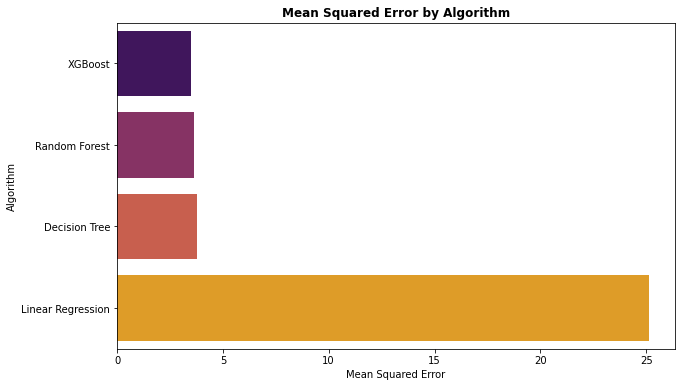

In [60]:
# Sort DataFrame by MSE in ascending order
dt_sorted = dt.sort_values(by='MSE')

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='MSE', y='Algorithm', data=dt_sorted, palette='inferno')
plt.title('Mean Squared Error by Algorithm', fontweight = 'bold')
plt.xlabel('Mean Squared Error')
plt.ylabel('Algorithm')
plt.show()

# **END**